___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://static.wixstatic.com/media/aa08c3_4431b1d1a196452bb094eb2f08d4c4eb.png/v1/fit/w_620%2Ch_277%2Cal_c/file.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://static.wixstatic.com/media/aa08c3_4431b1d1a196452bb094eb2f08d4c4eb.png/v1/fit/w_620%2Ch_277%2Cal_c/file.png</p>

### <font color= #2E9AFE> Tema: Regresión Lineal</font>

La regresión es una técnica de aprendizaje supervisado que busca encontrar relación entre variables.
Un problema de regresión es cuando la variable de salida es discreta o continuar.

**¿Qué vamos a ver?**
1. Qué es regresión?
2. Cuál es el promedio de la regresión lineal y cuál es la importancia de la regresión?
3. Impacto de distintos valores para la tasa de aprendizaje
4. Implementar en Python

**¿Qué es la regresión?**

La regresión muestra una línea o curva que pasa por todos los puntos de datos en un gráfico de tal manera que la distancia vertical entre los puntos de datos y la línea de regresión es la mínima.

Se usa principalmente para predicción pero también es muy usada para determinar la relación causa-efecto de las variables.

Si hay una sola variable de entrada (x), dicha regresión lineal se denomina *regresión lineal simple*. Y si hay más de una variable de entrada, dicha regresión lineal se denomina *regresión lineal múltiple*.


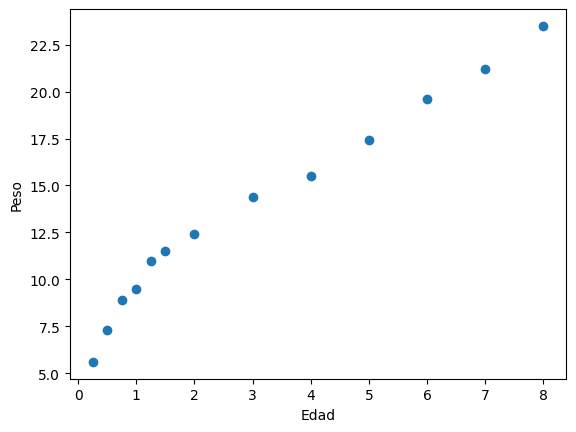

In [1]:
#Relación lineal positiva
import matplotlib.pyplot as plt

edad = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 3, 4, 5, 6, 7, 8]
peso = [5.6, 7.3, 8.9, 9.5, 11, 11.5, 12.4, 14.4, 15.5, 17.4, 19.6, 21.2, 23.5]
plt.scatter(edad, peso)
plt.xlabel("Edad")
plt.ylabel("Peso")
plt.show()

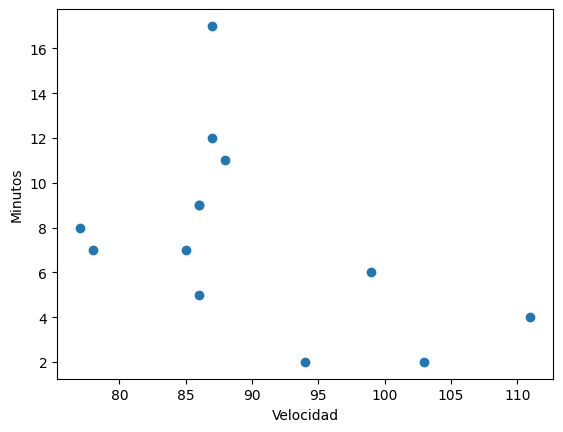

In [2]:
#Relacion lineal negativa
import matplotlib.pyplot as plt

Minutos = [6, 9, 12, 11, 4, 9, 2, 17, 2, 7, 8, 7, 5]
Velocidad = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]
plt.scatter(Velocidad, Minutos)
plt.xlabel("Velocidad")
plt.ylabel("Minutos")
plt.show()

El gráfico presenta la relación lineal entre la variable dependiente (Y) y la variables independiente (X). Cuando el valor de x aumenta, el valor de y disminuye.

Para calcular la línea que mejor se ajusta, la regresión lineal usa la forma tradicional de pendiente e intercepto:
$$y=mx+b \rightarrow y=a_{0}+a_{1}x$$

- y= Variable dependiente
- x = Variable independiente
- $a_{0}$ = Intercepto de la línea
- $a_{1}$ = Coeficiente de regresión lineal

In [3]:
pip install scipy

In [4]:
#Aplicamos una regresión lineal usando la libreria de scipy con el fin de graficar la línea ajustada
from scipy import stats
pendiente, intercepto, r, p, std_err = stats.linregress(Velocidad, Minutos)

In [5]:
pendiente

-0.20564683142344337

Interpretación:

Por cada aumento de una unidad en la velocidad, el tiempo disminuye -0.2

In [6]:
intercepto

26.076142482396804

Interpretación:

Si no hubiera aumento en la velocidad, el tiempo para llegar es de 26 min

In [7]:
#Calculando a mano la primer predicción
y_pred1 = -0.20564683142344337*99 +26.076142482396804
y_pred1

5.717106171475912

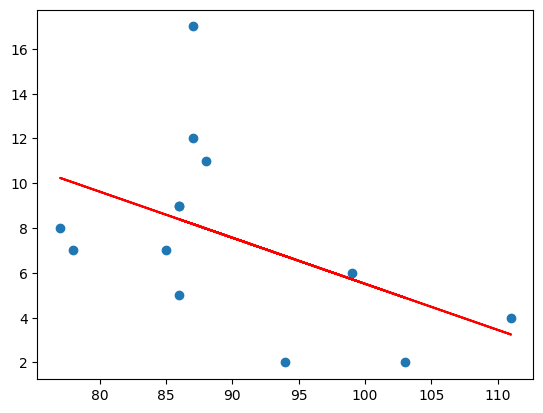

In [8]:
def linReg(x):
  return pendiente * x + intercepto

mymodel = list(map(linReg, Velocidad))

plt.scatter(Velocidad, Minutos)
plt.plot(Velocidad, mymodel, 'r')
plt.show()

La línea roja se conoce como la línea recta de mejor ajuste. Con base en los puntos de datos dados, intentamos trazar una línea que modele mejor los puntos.

In [9]:
Minutos

[6, 9, 12, 11, 4, 9, 2, 17, 2, 7, 8, 7, 5]

In [10]:
mymodel

[5.717106171475912,
 8.390514979980676,
 8.184868148557232,
 7.9792213171337885,
 3.2493441943945918,
 8.390514979980676,
 4.894518845782137,
 8.184868148557232,
 6.745340328593127,
 10.035689631368221,
 10.241336462791665,
 8.59616181140412,
 8.390514979980676]

#### Funcion de costo

La función de costo ayuda a determinar los mejores valores posibles para a0 (intercepto) y a1 (pendiente), lo que proporciona la línea de mejor ajuste para los puntos de datos.

La función de costo optimiza los coeficientes de regresión y mide cómo se está desempeñando un modelo de regresión lineal.

En la regresión lineal, se utiliza la función de costo del error cuadrático medio (MSE), que es el promedio del error cuadrático que se produjo entre los valores predichos y los valores reales.

$$MSE = \frac{1}{N}\sum_{i=1}^{n}(y_{i}-(mx_{i}+b))^{2}$$

#### Gradiente Descendente

Es un método que va actualizando a0 y a1 para minimizar la función de costo (MSE).

Un modelo de regresión usa el gradiente descendiente para actualizar los coeficientes de la línea al reducir la función de costo mediante una selección aleatoria de valores de coeficientes y luego actualizar iterativamente los valores para alcanzar la función de costo mínimo.

**Ejemplo**

Tomaremos números aleatorios para crear la variable dependiente (salario) y una variable independiente (experiencia) y predeciremos el impacto de un año de experiencia en el salario.

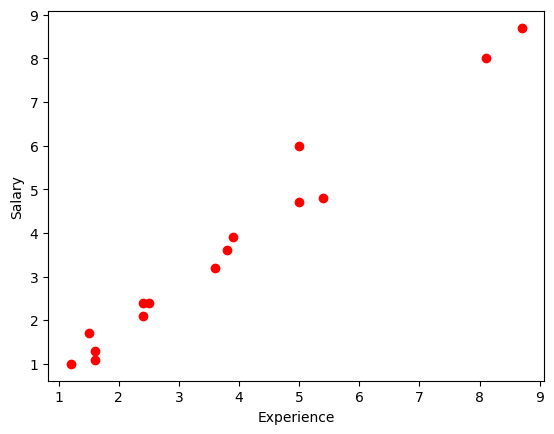

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

experiencia= np.array([2.4,5.0,1.5,3.8,8.7,3.6,1.2,8.1,2.5,5,1.6,1.6,2.4,3.9,5.4])
salario = np.array([2.1,4.7,1.7,3.6,8.7,3.2,1.0,8.0,2.4,6,1.1,1.3,2.4,3.9,4.8])
n = np.size(salario)
plt.scatter(experiencia,salario, color = 'red')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

Calculando los coeficientes:

1. Inicializar los parámetros
2. Predecir la "Y"
3. Calcule el error en la predicción para todos los puntos de datos.
4. Calcule la derivada parcial de la función de costo contra a0 y a1.
5. Calcula el costo de cada número y súmalos.
6. Actualice los valores de a0 y a1.

In [12]:
#Regresión lineal manualmente...
#initializar parámetros
a0 = 0                  #intercepto
a1 = 0                  #pendiente
lr = 0.0001             #tasa aprendizaje
iterations = 1000       #número de iteraciones
error = []              #calcular el costo para cada iteración.
for itr in range(iterations):
    error_cost = 0
    cost_a0 = 0
    cost_a1 = 0
    for i in range(len(experiencia)):
        y_pred = a0+a1*experiencia[i]   # predecir la Y para cada X dada
        error_cost = error_cost +(salario[i]-y_pred)**2
        for j in range(len(experiencia)):
            partial_wrt_a0 = -2 *(salario[j] - (a0 + a1*experiencia[j]))                #derivada parcial de a0
            partial_wrt_a1 = (-2*experiencia[j])*(salario[j]-(a0 + a1*experiencia[j]))   #derivada parcial de a1
            cost_a0 = cost_a0 + partial_wrt_a0      #calcular el costo para número y sumar
            cost_a1 = cost_a1 + partial_wrt_a1      #calcular el costo para número y sumar
        a0 = a0 - lr * cost_a0    #actualizar a0
        a1 = a1 - lr * cost_a1    #actualizar a1
        error.append(error_cost)      #arreglo con los errores

print(a0)
print(a1)

-0.21354150071690242
1.0247464287610857


In [13]:
#con numpy
experiencia1= np.squeeze(np.array(experiencia))
salario1 =np.squeeze(np.array(salario))

modelo_numpy = np.polyfit(experiencia1, salario1, 1)
modelo_numpy

array([ 1.02474643, -0.2135415 ])

In [14]:
#predecir el salario con los coeficientes que acabamos de encontrar
pred = a0+a1*experiencia
print(pred)

[2.24584993 4.91019064 1.32357814 3.68049493 8.70175243 3.47554564
 1.01615421 8.08690457 2.34832457 4.91019064 1.42605279 1.42605279
 2.24584993 3.78296957 5.32008921]


In [15]:
salario

array([2.1, 4.7, 1.7, 3.6, 8.7, 3.2, 1. , 8. , 2.4, 6. , 1.1, 1.3, 2.4,
       3.9, 4.8])

Text(0, 0.5, 'salario')

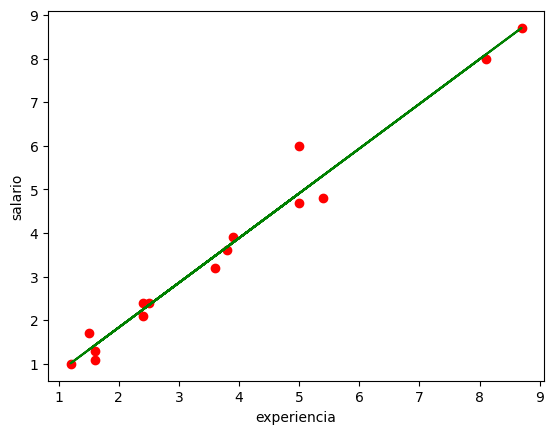

In [16]:
#graficamos
plt.scatter(experiencia,salario,color = 'red')
plt.plot(experiencia,pred, color = 'green')
plt.xlabel("experiencia")
plt.ylabel("salario")

In [17]:
#qué tan bueno es mi modelo?

#Error cuadrático medio
error1 = salario - pred
se = np.sum(error1 ** 2)
mse = se/n
print("el error cuadrático medio (MSE) es:", mse)

el error cuadrático medio (MSE) es: 0.12785817711928918


In [18]:
#R2
pred = np.poly1d(modelo_numpy)
yhat = pred(experiencia)
ybar = np.sum(salario)/len(salario)
sstot = np.sum((salario - ybar)**2)
ssreg = np.sum((yhat-ybar)**2)
results = ssreg / sstot
print("la R2 es:", results)

la R2 es: 0.9763272358942761


No se preocupen... todo esto se puede hacer rápido en sklearn

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



In [20]:
experiencia = experiencia.reshape(-1,1)

#Inicializar el modelo
model = LinearRegression()

#Ajustar modelo a mis datos
model.fit(experiencia, salario)

#Predecir datos del pasado
salario_pred = model.predict(experiencia)

#MSE
print(mean_squared_error(salario, salario_pred))

0.12785817711928915


In [21]:
print('pendiente', model.coef_)


pendiente [1.02474643]


In [22]:
print('intercepto', model.intercept_)

intercepto -0.21354150071690547


**¿Cómo se interpreta?**

*Los Coeficientes:* Por cada año extra que una persona trabaje (osea por cada año de experiencia), el salario aumenta en 1.024

*La R2:* La experiencia explica 97% de la variación del salario de la persona.  

Acuérdense de... todos los datos no los usamos! los de entrenamiento nada más para ajustar el modelo

In [23]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(experiencia, salario, test_size=0.3, random_state = 5)

#Inicializar el modelo
model = LinearRegression()

#Ajustar modelo a mis datos
model.fit(X_train, y_train)

#Predecir datos del pasado
salario_pred = model.predict(X_test)

#MSE
print(mean_squared_error(y_test, salario_pred))

0.09640474566825234


In [24]:
#R^2 -> mientras más cercano al 1, mejor :)
r2 = r2_score(y_test, salario_pred)
print("R2", r2)

R2 0.9841917969191505


In [25]:
#Prediciendo cuánto debe ganar una persona con 20 años de experiencia
nuevo_predict = model.predict([[20]])
print(nuevo_predict)

[20.61444944]


In [26]:
#cross validation
from sklearn.model_selection import cross_val_score

#Inicializar el modelo
model = LinearRegression()

resultado_cross = (-cross_val_score(model, experiencia, salario, cv=10, scoring='neg_root_mean_squared_error')).mean()
print(resultado_cross)

0.30610210474453686


### Regularización

Es añadir un término de penalización a los coeficientes. Este tipo de modelos funciona muy bien cuando tenemos más de una variable predictora (X)

#### Ridge Regression

La regresión de Ridge ayuda a reducir la Varianza al reducir el tamaño de los parámetros y haciendo que nuestras predicciones sean menos sensibles a los parámetros.

$$Ridge = \sum_{i=1}^{n}(y_{i}-f(x_{i}))^{2}+\lambda\sum_{j=1}^{p}\beta_{j}^{2}$$

**¿Cuándo se recomienda usar?**
Sobre todo cuando tenemos pocos datos, ya que la regresión de Ridge mejora las predicciones hechas con nuevos datos (reduce la varianza), haciendo que las predicciones sean menos sensibles a los datos de entrenamiento.

In [27]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1)

#entrenando el modelo de ridge
clf.fit(experiencia,salario)

#prediciendo
salario_pred = clf.predict(experiencia)

#Métricas de performance
Mse = mean_squared_error(salario, salario_pred)
r2 = r2_score(salario, salario_pred)
print("MSE", Mse)
print("R2", r2)

MSE 0.12876339410979126
R2 0.9761596362243647


In [28]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(experiencia, salario, test_size=0.3, random_state=5)
model = Ridge(alpha=1)
model.fit(X_train,y_train)
salario_pred = model.predict(X_test)
Mse = mean_squared_error(y_test, salario_pred)
print("MSE", Mse)
r2 = r2_score(y_test, salario_pred)
print("R2", r2)

MSE 0.08712333478470628
R2 0.9857137388848376


In [29]:
#Cross Validation
from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas=np.arange(0.01,1,0.01), cv=10, scoring='neg_mean_squared_error')
model.fit(experiencia, salario)
print('alfa: %f' % model.alpha_)
print('MSE',-model.best_score_)

alfa: 0.430000
MSE 0.14537064440575004


#### LASSO Regularization

La ventaja de LASSO es que dentro de su proceso, hace que ciertos coeficientes se hagan cero y por lo tanto tiene un proceso de selección de variables interno.

$$LASSO = \sum_{i=1}^{n}(y_{i}-f(x_{i}))^{2}+\lambda\sum_{j=1}^{p}|\beta_{j}|$$

In [30]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=1)
clf.fit(experiencia,salario)
salario_pred = clf.predict(experiencia)
Mse = mean_squared_error(salario, salario_pred)
r2 = r2_score(salario, salario_pred)
print("MSE", Mse)
print("R2", r2)

MSE 0.3269978935443322
R2 0.9394567936806929


In [31]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(experiencia, salario, test_size=0.3, random_state=5)
model = Lasso(alpha=.03)
model.fit(X_train,y_train)
salario_pred = model.predict(X_test)
Mse = mean_squared_error(y_test, salario_pred)
print("MSE", Mse)
r2 = r2_score(y_test, salario_pred)
print("R2", r2)

MSE 0.09302973548965884
R2 0.9847452224370886


In [32]:
#Cross Validation
from sklearn.linear_model import LassoCV
model = LassoCV(alphas=np.arange(0.01,1,0.01), cv=10, random_state=5).fit(experiencia, salario)
print('lambda: %f' % model.alpha_)
print('R2',model.score(experiencia, salario))

lambda: 0.030000
R2 0.9762940524962838


El cross validation de LASSO CV tiene por default la métrica de la $R^{2}$, se necesitaría usar otro método para calcular el MSE

**¿Cuándo las utilizo?**
- Ridge es mejor cuando la mayoría de mis variables son útiles
- LASSO excluye automáticamente variables inútiles del modelo